it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts

In [1]:
import matplotlib.pyplot as plt
import numpy as np

 we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure

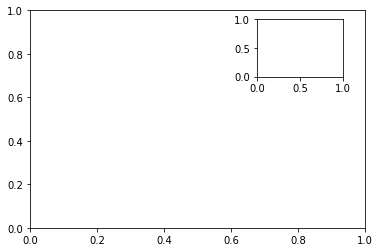

In [2]:
#coordinate :[bottom,left,width,height]
ax1=plt.axes()
ax2=plt.axes([0.65,.65,.2,.2])

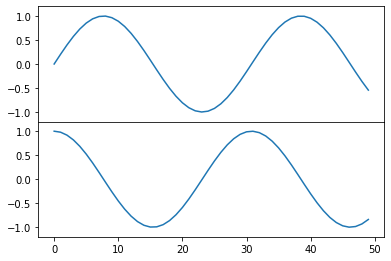

In [3]:
# the equivalent of this command within object oriented interface is fig.add_axes()
fig=plt.figure()
ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[],ylim=(-1.2,1.2))
ax2=fig.add_axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))

x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## plt.subplot : simple Grid of subplots

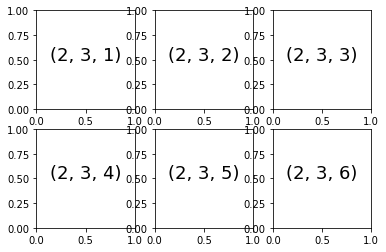

In [4]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')

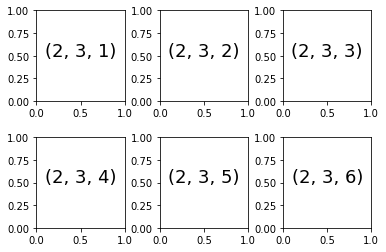

In [5]:
# adjust the spacing between plots
fig=plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')

## plt.subplot() : the whole grid in one go
 sharex and sharey, which allow you to specify the relationships between different axes. 
 
 create a 2×3 grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scal

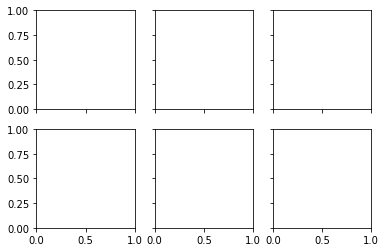

In [9]:
fig,ax=plt.subplots(2,3,sharex='col',sharey='row')

 specifying sharex and sharey, we’ve automatically removed inner labels on the grid to make the plot cleaner. The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation 

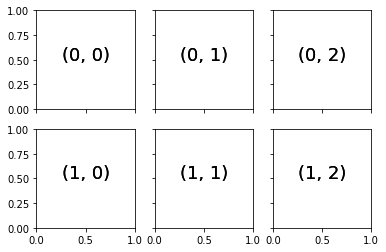

In [13]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize=18,ha='center')
fig

## plt.GridSpec:More complicated arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, plt.GridSpec() is the best tool

 gridspec for a grid of two rows and three columns with some specified width and height space

In [22]:
grid=plt.GridSpec(2,3,wspace=0.4,hspace=0.3)


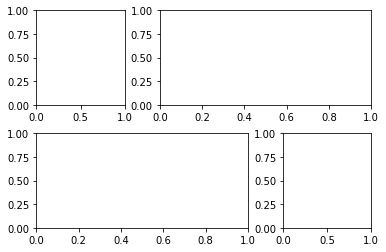

In [38]:
# Irregular subplots with plt.GridSpec
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:]) # 1,2
plt.subplot(grid[1,:2]) # 0,1
plt.subplot(grid[1,2])


### Multi axes histogram plots 

In [42]:
# create some normally distributed data
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,3000).T

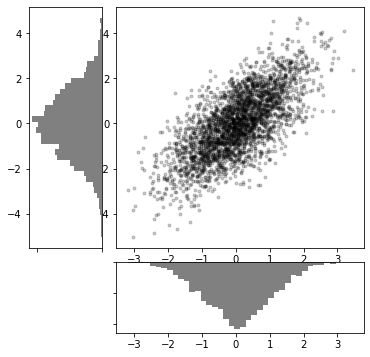

In [60]:
# set up the axes with gridspec
fig=plt.figure(figsize=(6,6))
grid=plt.GridSpec(4,4,hspace=0.2,wspace=0.2)
main_ax=fig.add_subplot(grid[:-1,1:])
y_hist=fig.add_subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist=fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)

# scatter points on the main axes

main_ax.plot(x,y,'ok',markersize=3,alpha=0.2)

#histogram on attached axes

x_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color='gray')
x_hist.invert_yaxis()

y_hist.hist(y,40,histtype='stepfilled',orientation='horizontal',color='gray')
y_hist.invert_xaxis()

In [62]:
#Visualizing multidimentional distributions with plt.GridSpec